In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

ubuntu_colors = ["#E95420", "#77216F", "#5E2750", "#2C001E", "#AEA79F"]
sns.set_palette(ubuntu_colors)

df = pd.read_csv('Data.csv')

In [4]:
#%% DATA INSPECTION - "Understanding Our Community"
print("="*55)
print("STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)")
print("="*55)

STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)


In [6]:
# data exploration
print(f"\n📊 Dataset Shape: {df.shape}")
print("\n🧾 First 5 Rows:")
display(df.head())


📊 Dataset Shape: (6, 5)

🧾 First 5 Rows:


,Country Name,GDP_2020,Population_2020,GDP_per_capita_2020,CO2_Emissions_2020
0,Kenya,1.010000e+11,51985780,1878.58,12.620
1,Burundi,2.840000e+09,12220227,238.99,0.713
2,Uganda,3.760000e+10,44404611,822.03,5.000
3,Nigeria,1.146000e+12,213990000,5358.00,116.070
4,South Africa,3.500000e+11,59600000,5872.00,393.240


In [7]:
df = pd.read_csv('Data.csv')

# Now call describe() on the DataFrame
print(df.describe())
# Missing information
print (df.isnull().sum())

           GDP_2020  Population_2020  GDP_per_capita_2020  CO2_Emissions_2020
count  6.000000e+00     6.000000e+00             6.000000            6.000000
mean   2.749067e+11     6.411677e+07          3161.600000           91.960500
std    4.459015e+11     7.682186e+07          2470.472546          153.711475
min    2.840000e+09     2.500000e+06           238.990000            0.713000
25%    1.840000e+10     2.026632e+07          1086.167500            6.905000
50%    6.930000e+10     4.819520e+07          3339.290000           18.370000
75%    2.877500e+11     5.769644e+07          5218.500000           93.082500
max    1.146000e+12     2.139900e+08          5872.000000          393.240000
Country Name           0
GDP_2020               0
Population_2020        0
GDP_per_capita_2020    0
CO2_Emissions_2020     0
dtype: int64


In [8]:
# Data exploration
print("\n" + "="*55)
print("  step 2:Building the regressional Models (Ubuntu: Data Exploration)")
print("="*55)


  step 2:Building the regressional Models (Ubuntu: Data Exploration)


In [9]:
# Defining the regressional model features by grouping them into dependent and independent variables

features = ["GDP_2020", "Population_2020", "GDP_per_capita_2020"]
target = "CO2_Emissions_2020"
X = df[features]
y = df[target]
# Linear regressional model training
model = LinearRegression()
model.fit(X, y)
# Summary output
df["Predicted_CO2"] = model.predict(X)
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))
print("R² score:", model.score(X, y))


Intercept: -5.340507179427618
Coefficients: {'GDP_2020': 2.2168320780757504e-10, 'Population_2020': -1.3549784964312559e-06, 'GDP_per_capita_2020': 0.03897889031630894}
R² score: 0.5066767450853569


In [10]:
# Data exploration
print("\n" + "="*55)
print("  step 3:Visualizing predictions (Ubuntu: Data Exploration)")
print("="*55)


  step 3:Visualizing predictions (Ubuntu: Data Exploration)


In [14]:
from sklearn.linear_model import LinearRegression

# Features and target
features = ["GDP_2020", "Population_2020", "GDP_per_capita_2020"]
target = "CO2_Emissions_2020"
X = df[features]
y = df[target]

# Train model
model = LinearRegression()
model.fit(X, y)

# Generate predictions and add to DataFrame
df["Predicted_CO2"] = model.predict(X)

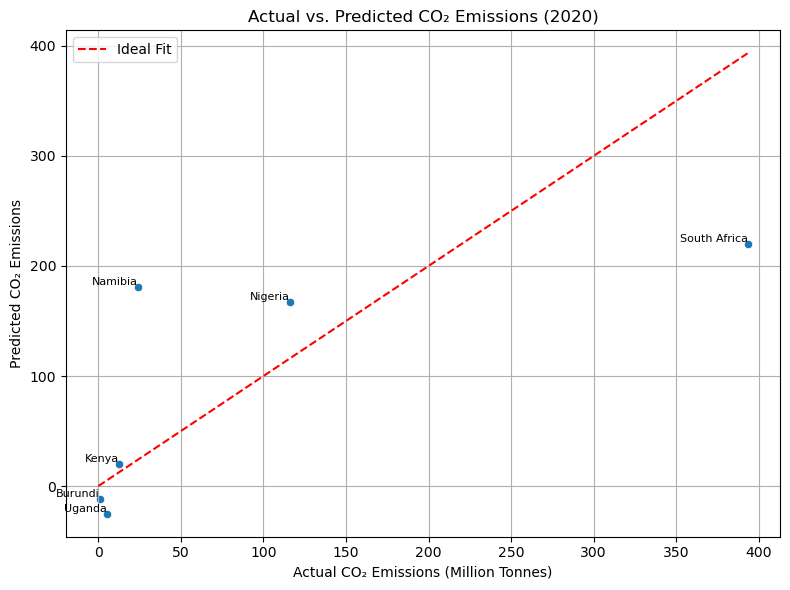

In [16]:
#actual vs predicted CO₂ emissions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Scatterplot of actual vs predicted
sns.scatterplot(x="CO2_Emissions_2020", y="Predicted_CO2", data=df)

# Ideal line: where predicted == actual
max_val = max(df["CO2_Emissions_2020"].max(), df["Predicted_CO2"].max())
plt.plot([0, max_val], [0, max_val], 'r--', label="Ideal Fit")

# Add country labels to points
for i in range(df.shape[0]):
    plt.text(
        df.loc[i, "CO2_Emissions_2020"],
        df.loc[i, "Predicted_CO2"],
        df.loc[i, "Country Name"],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Plot formatting
plt.xlabel("Actual CO₂ Emissions (Million Tonnes)")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs. Predicted CO₂ Emissions (2020)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




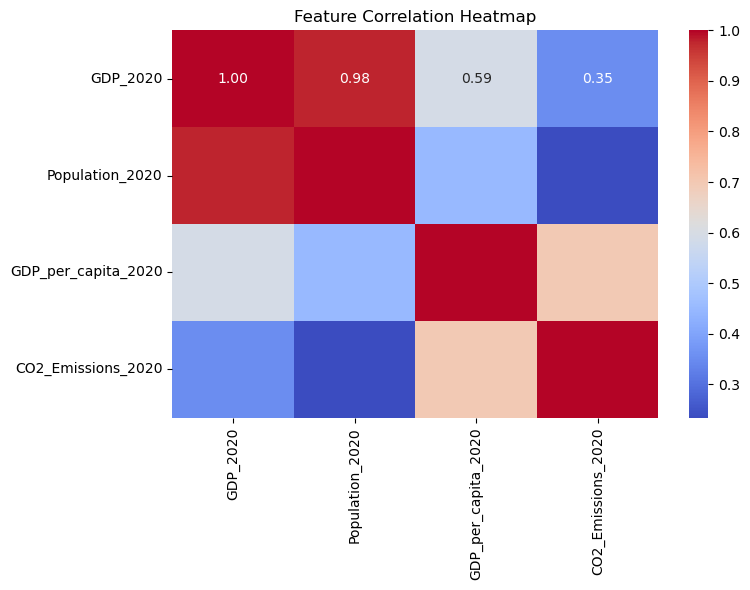

In [15]:
# Correlation analysis via heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + ["CO2_Emissions_2020"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

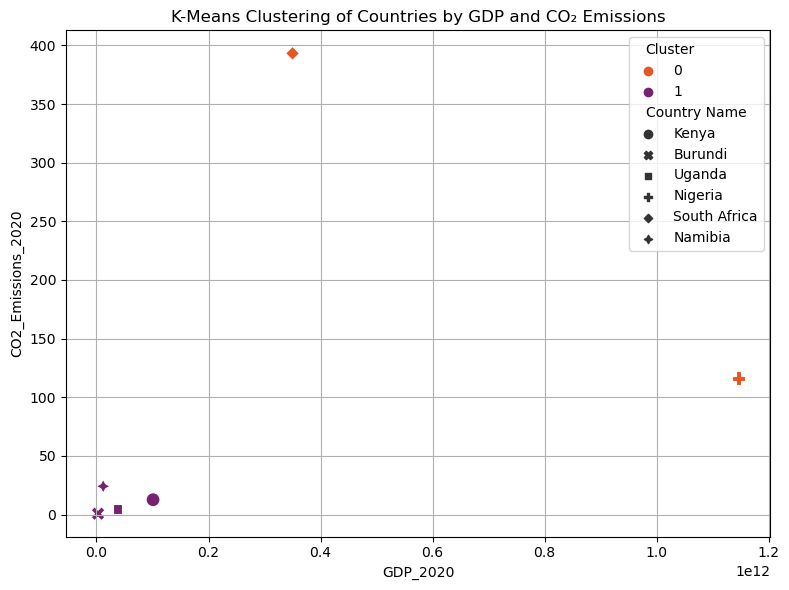

In [19]:
# KMeans Clustering
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features + ["CO2_Emissions_2020"]])

# Fixed line: explicitly set n_init parameter
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="GDP_2020", y="CO2_Emissions_2020", hue="Cluster", style="Country Name", s=100)
plt.title("K-Means Clustering of Countries by GDP and CO₂ Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Final dataset preview
print("\n Preprocessed Data Ready for Modeling:")
display(df.head())



 Preprocessed Data Ready for Modeling:


,Country Name,GDP_2020,Population_2020,GDP_per_capita_2020,CO2_Emissions_2020,Predicted_CO2,Cluster
0,Kenya,1.010000e+11,51985780,1878.58,12.620,19.834847,1
1,Burundi,2.840000e+09,12220227,238.99,0.713,-11.953507,1
2,Uganda,3.760000e+10,44404611,822.03,5.000,-25.130694,1
3,Nigeria,1.146000e+12,213990000,5358.00,116.070,167.605495,0
4,South Africa,3.500000e+11,59600000,5872.00,393.240,220.375941,0


In [ ]:
# 